In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Gibbs sampling for a one sample t-test

Chapter 3.2.1: Gibbs sampling

Assume $Y_i \mid \mu,\sigma^2\sim\mbox{Normal}(\mu,\sigma^2)$ for $i=1,\dots,n$ and let the prior distributions be $\mu\sim\mbox{Normal}\left(0,\frac{\sigma^2}{m}\right)$ and $\sigma^2\sim\mbox{InvGamma}(a,b)$. It can be shown (Chapter 2) that the full conditional distributions are:

$$\mu \mid \sigma^2,Y_1, \dots,Y_n\sim\mbox{Normal}\left(\frac{\sum_{i=1}^nY_i}{n+m},\frac{\sigma^2}{n+m}\right)$$
and 

$$\sigma^2 \mid \mu,Y_1, \dots,Y_n\sim\mbox{InvGamma}\left(a+ \frac{n}{2},b+\frac{\sum_{i=1}^n(Y_i-\mu)^2}{2}\right)$$

Gibbs sampling iterates between drawing from these two (univariate) full conditional distributions to produce samples from the joint (bivariate) posterior distribution.

## Load the galaxy data

(array([ 7.,  0.,  0.,  0.,  2.,  2., 20., 16., 17., 11.,  2.,  2.,  0.,
         0.,  1.,  2.]),
 array([ 9172.    , 10741.1875, 12310.375 , 13879.5625, 15448.75  ,
        17017.9375, 18587.125 , 20156.3125, 21725.5   , 23294.6875,
        24863.875 , 26433.0625, 28002.25  , 29571.4375, 31140.625 ,
        32709.8125, 34279.    ]),
 <a list of 16 Patch objects>)

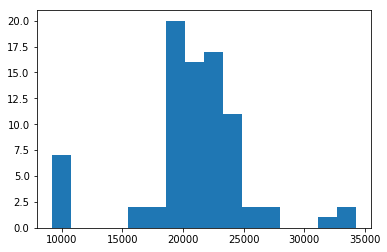

In [2]:
Y = np.loadtxt('data/galaxies.csv')
n = len(Y)
plt.hist(Y, bins='auto')

In [3]:
(stats.invgamma(2, scale=1/5).rvs(100000)).mean()

0.19969745420614723

## Fix the priors

In [4]:
m = 0.01
a = 0.01
b = 0.01

## Gibbs sampling

In [5]:
n_iters = 3000
keep_mu = np.zeros(n_iters)
keep_s2 = np.zeros(n_iters)

# Initial values
mu = np.mean(Y)
s2 = np.var(Y)
keep_mu[0] = mu
keep_s2[0] = s2

for i in range(1, n_iters):
    # sample mu|s2,Y
    MN = np.sum(Y) / (n+m)
    VR = s2/(n+m)
    mu = stats.norm(MN, VR**0.5).rvs(1)

    # sample s2|mu,Y
    A = a + n/2
    B = b + np.sum((Y-mu)**2)/2
    s2 = stats.invgamma(A, scale=B).rvs(1)

    # keep track of the results
    keep_mu[i] = mu
    keep_s2[i] = s2

Text(0, 0.5, 's2')

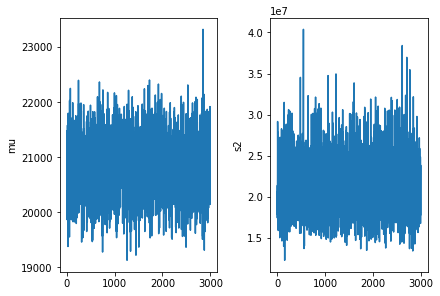

In [6]:
_, ax = plt.subplots(1, 2, constrained_layout=True)
ax[0].plot(keep_mu)
ax[0].set_ylabel('mu')
ax[1].plot(keep_s2)
ax[1].set_ylabel('s2')

## Plot the samples from the joint posterior of 

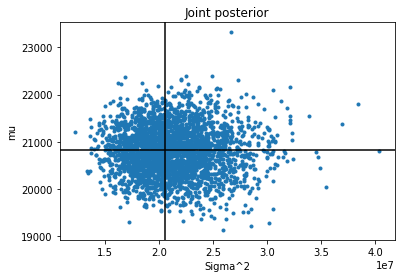

In [7]:
plt.plot(keep_s2, keep_mu, '.')
plt.xlabel("Sigma^2")
plt.ylabel("mu")
plt.title("Joint posterior")
plt.axhline(np.mean(Y), color='k')
plt.axvline(np.var(Y), color='k')

## Plot the samples from the marginal (over $\sigma^2$) posterior of $\mu, p(\mu \mid Y_1,…,Y_n)$

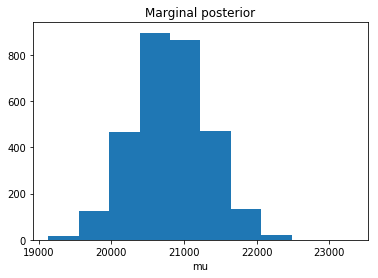

In [8]:
plt.hist(keep_mu)
plt.xlabel("mu")
plt.title("Marginal posterior");

## Plot the samples from the marginal (over $\mu$) posterior of $\sigma, p(\sigma \mid Y_1,…,Y_n)$

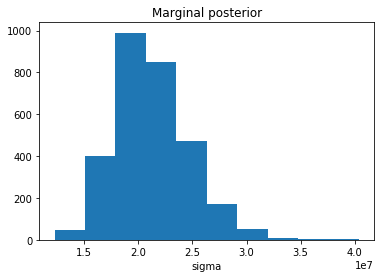

In [9]:
keep_s = keep_s2**0.5
plt.hist(keep_s2)
plt.xlabel("sigma")
plt.title("Marginal posterior");

## Compute the approximate marginal means and 95\% credible sets

In [10]:
keep_mu.mean() # mu

20809.039884721467

In [11]:
np.quantile(keep_mu, [0.025, 0.975])

array([19829.28322785, 21824.56595633])

In [12]:
keep_s2.mean()  # sigma^2

21268427.60729499

In [13]:
np.quantile(keep_s2, [0.025, 0.975])

array([15527190.62140117, 28813428.50558687])

In [14]:
keep_s.mean()

4597.186909066695

## Plot the data versus the fitted model

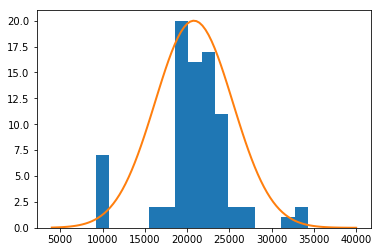

In [15]:
mu_hat = keep_mu.mean()
sig_hat = keep_s.mean()
count, *_ = plt.hist(Y, bins='auto')
y = np.linspace(4000, 40000, 100)
d = stats.norm(mu_hat, sig_hat).pdf(y)
d = max(count)*d/max(d)
plt.plot(y, d, lw=2, c='C1')